## Visualization of NLS Solutions 

**Lane Ellisor**

*Last Edited: 20 June 2021*

In [1]:
# importing modules
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
import scipy.integrate as integrate
import scipy.special as special
import sympy as sp
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from numpy import arange,meshgrid,sqrt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.widgets import Slider, Button, RadioButtons
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import warnings

warnings.filterwarnings("ignore")

### Frequency Visualizations

We will begin by plotting frequency for the undamped case;

$$\sqrt{k^2(k^2-4a^2)} = \omega$$

where $k$ is the wave number and $a$ is the amplitude. Note that instability will occur when

$$k^2 < 4a^2 $$

or $k<2a$.

In [2]:
def f(a):
    x = np.linspace(-5,5,50)
    
    w = np.sqrt(x**2*(x**2-4*a**2))
    
    plt.ylim(-1,7)
    plt.plot(x,w)
    plt.axhline(y=0, color='C7', linewidth=.8)
    plt.axvline(x=0, color='C7', linewidth=.8)
    
    plt.xlabel('Wave Number ($k$)')
    plt.ylabel('Frequency ($\omega$)')
    plt.title('Frequency vs. Wavenumber')
    
    # Shade the area between y1 and line y=0
    plt.fill_between(x, w, 0, where= x<2*a,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

    plt.text(.8,-.6,'Shaded Region: Unstable')
    plt.legend(['Frequency'])
    
    plt.show()
interact(f, a= 1.00)

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.f(a)>

We now plot frequency for the damped case;

$$\pm k\sqrt{k^2-4a^2e^{-2\Gamma t}} = \omega$$

where $\Gamma$ is the damping coefficient. These plots will be found at the times $t=1$ and $t=10$. The stability condition here is 

$$k^2-4a^2e^{-2\Gamma t}<0$$

or $k^2<4a^2e^{-2\Gamma t}$.

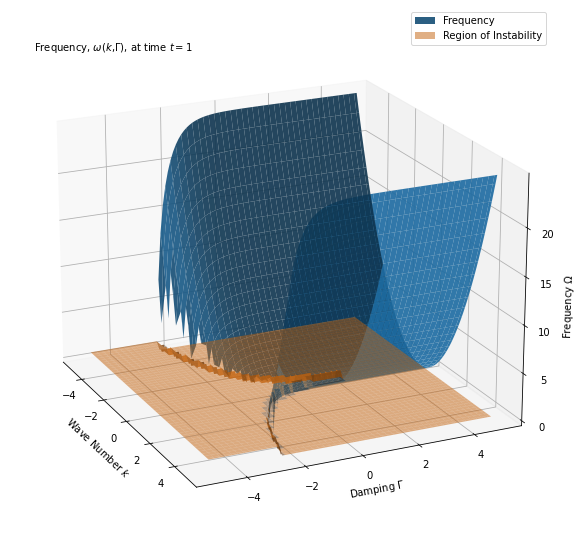

In [3]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111,projection='3d')

ax.view_init(elev=20, azim=-25)
# Make data.
k = np.linspace(-5, 5, 100)
g = np.linspace(-5, 5, 100)
K, G = np.meshgrid(k, g) #creating the mesh

t = 1
a = .2

w = np.sqrt((-K**2)*(4*a**2*np.exp(-2*G*t)-K**2))

# Plot the surface.
surf1 = ax.plot_surface(K, G, w, alpha=.9, label='Frequency')
surf1._facecolors2d = surf1._facecolor3d
surf1._edgecolors2d = surf1._edgecolor3d

disc = k**2 - 4*a**2*np.exp(-2*G*t)
surf2 = ax.plot_surface(K, G, disc<0,alpha=.5, label='Region of Instability')
surf2._facecolors2d = surf2._facecolor3d
surf2._edgecolors2d = surf2._edgecolor3d


#labelling axes
ax.set_xlabel('Wave Number $k$')
ax.set_ylabel('Damping $\Gamma$')
ax.set_zlabel('Frequency $\Omega$')

ax.text2D(0.05, 0.92, "Frequency, $\omega$($k$,$\Gamma$), at time $t=1$", transform=ax.transAxes)
ax.legend()
plt.show()

In [4]:
def f(a, elevation, azimuth):
    fig = plt.figure(figsize = (10,10))

    ax = fig.add_subplot(111,projection='3d')

    ax.view_init(elev=elevation, azim=azimuth)
    
    # Make data.
    k = np.linspace(-5, 5, 100)
    g = np.linspace(-5, 5, 100)
    K, G = np.meshgrid(k, g) #creating the mesh

    t = 1

    w = np.sqrt((-K**2)*(4*a**2*np.exp(-2*G*t)-K**2))
    
    
    
    # Plot the surface.
    surf = ax.plot_surface(K, G, w, rstride=1, cstride=1,edgecolor='none')
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d
    
    
    disc = k**2 - 4*a**2*np.exp(-2*G*t)
    surf2 = ax.plot_surface(K, G, disc<0, alpha=.5, label='Region of Instability')
    surf2._facecolors2d = surf2._facecolor3d
    surf2._edgecolors2d = surf2._edgecolor3d
    
    #labelling axes
    ax.set_xlabel('Wave Number $k$')
    ax.set_ylabel('Damping $\Gamma$')
    ax.set_zlabel('Growth Rate $\Omega$')
    
    
    ax.text2D(0.05, 0.92, "Frequency at time $t=1$, with Amplitude Slider", transform=ax.transAxes)
    
    plt.legend()
    plt.show()
    
interact(f, a=1.00, elevation=20, azimuth=-50)



interactive(children=(FloatSlider(value=1.0, description='a', max=3.0, min=-1.0), IntSlider(value=20, descript…

<function __main__.f(a, elevation, azimuth)>

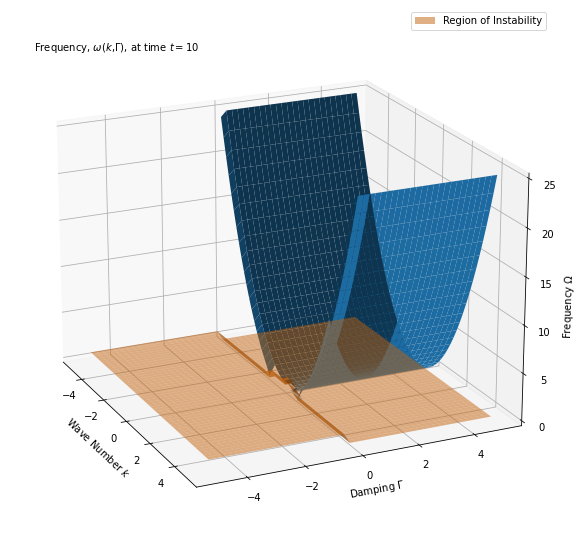

In [5]:
#definition of figure => make sure to specify 3d
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111,projection='3d')

ax.view_init(elev=20, azim=-25)
# Make data.
k = np.linspace(-5, 5, 50)
g = np.linspace(-5, 5, 50)
K, G = np.meshgrid(k, g) #creating the mesh

t = 10

w = np.sqrt((-K**2)*(4*a**2*np.exp(-2*G*t)-K**2))

# Plot the surface.
surf = ax.plot_surface(K, G, w,rstride=1, cstride=1,edgecolor='none')


disc = k**2 - 4*a**2*np.exp(-2*G*t)
surf2 = ax.plot_surface(K, G, disc<0, alpha=.5, label='Region of Instability')
surf2._facecolors2d = surf2._facecolor3d
surf2._edgecolors2d = surf2._edgecolor3d


#labelling axes
ax.set_xlabel('Wave Number $k$')
ax.set_ylabel('Damping $\Gamma$')
ax.set_zlabel('Frequency $\Omega$')

ax.text2D(0.05, 0.92, "Frequency, $\omega$($k$,$\Gamma$), at time $t=10$", transform=ax.transAxes)
plt.legend()
plt.show()

In [6]:
def f(a, elevation, azimuth):
    fig = plt.figure(figsize = (10,10))

    ax = fig.add_subplot(111,projection='3d')

    ax.view_init(elev=elevation, azim=azimuth)
    
    # Make data.
    k = np.linspace(-5, 5, 500)
    g = np.linspace(-5, 5, 500)
    K, G = np.meshgrid(k, g) #creating the mesh

    t = 1

    w = np.sqrt((-K**2)*(4*a**2*np.exp(-2*G*t)-K**2))
    
    
    
    # Plot the surface.
    surf = ax.plot_surface(K, G, w, rstride=1, cstride=1,edgecolor='none')
    
    disc = k**2 - 4*a**2*np.exp(-2*G*t)
    surf2 = ax.plot_surface(K, G, disc<0, alpha=.5, label='Region of Instability')
    surf2._facecolors2d = surf2._facecolor3d
    surf2._edgecolors2d = surf2._edgecolor3d
    
    #labelling axes
    ax.set_xlabel('Wave Number $k$')
    ax.set_ylabel('Damping $\Gamma$')
    ax.set_zlabel('Growth Rate $\Omega$')
    
    
    ax.text2D(0.05, 0.92, "Frequency at time $t=1$, with Amplitude Slider", transform=ax.transAxes)
    plt.show()

interact(f, a=1.00, elevation=20, azimuth=-50)



interactive(children=(FloatSlider(value=1.0, description='a', max=3.0, min=-1.0), IntSlider(value=20, descript…

<function __main__.f(a, elevation, azimuth)>

In [7]:
def f(a,t, elevation, azimuth):
    fig = plt.figure(figsize = (10,10))

    ax = fig.add_subplot(111,projection='3d')

    ax.view_init(elev=elevation, azim=azimuth)
    
    # Make data.
    k = np.linspace(-5, 5, 300)
    g = np.linspace(-5, 5, 300)
    K, G = np.meshgrid(k, g) #creating the mesh


    w = np.sqrt((-K**2)*(4*a**2*np.exp(-2*G*t)-K**2))
    
    
    
    # Plot the surface.
    surf = ax.plot_surface(K, G, w, rstride=1, cstride=1,edgecolor='none')
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d
    
    #labelling axes
    ax.set_xlabel('Wave Number $k$')
    ax.set_ylabel('Damping $\Gamma$')
    ax.set_zlabel('Growth Rate $\Omega$')
    disc = k**2 - 4*a**2*np.exp(-2*G*t)
    surf2 = ax.plot_surface(K, G, disc<0, alpha=.5, label='Region of Instability')
    surf2._facecolors2d = surf2._facecolor3d
    surf2._edgecolors2d = surf2._edgecolor3d
    
    ax.text2D(0.05, 0.92, "Interactive Frequency", transform=ax.transAxes)
    
    plt.legend()
    plt.show()

interact(f, a=1.00,t=widgets.IntSlider(min=0, max=30, step=1, value=1), elevation=20, azimuth=-50)



interactive(children=(FloatSlider(value=1.0, description='a', max=3.0, min=-1.0), IntSlider(value=1, descripti…

<function __main__.f(a, t, elevation, azimuth)>

### Plotting 

In [8]:
a = 1.
phi = np.pi / 4
O = .3
gamma = 2

p = 2*a*np.sin(phi)

A_12 = 1 / (np.cos(phi)**2)

In [9]:
#U = a*np.exp(2*a**2*T)*(1+2*np.cos(p*X)*np.exp(O*T+2*phi+gamma)+A_12 * np.exp(2*O*T+4*phi+2*gamma))

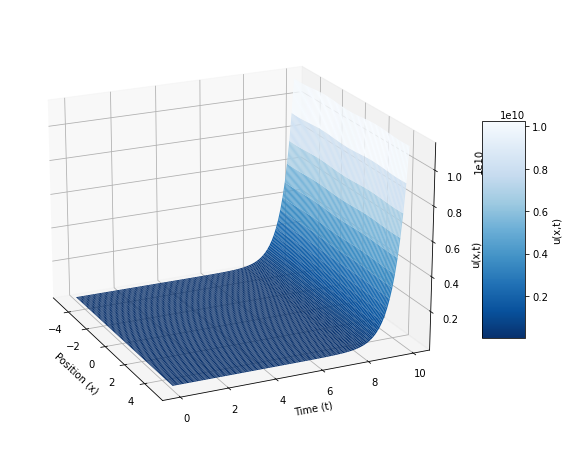

In [10]:
#definition of figure => make sure to specify 3d
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111,projection='3d')

ax.view_init(elev=20, azim=-25)
# Make data.
x = np.linspace(-5, 5,100)
t = np.linspace(0, 10, 100)
X, T = np.meshgrid(x, t) #creating the mesh



U = (a*np.exp(2*a**2*T)*(1+2*np.cos(p*X)*np.exp(O*T+2*phi+gamma)+A_12 * np.exp(2*O*T+4*phi+2*gamma)))/(1+2*np.cos(p*X)*np.exp(O*T+gamma)+A_12*np.exp(2*O*T+2*gamma))

# Plot the surface.
surf = ax.plot_surface(X, T, U, rstride=1, cstride=1,
                cmap='Blues_r', edgecolor='none')


# This is the creation of the color label by height
cbar = fig.colorbar(surf, shrink=.4, aspect=5)
cbar.ax.set_ylabel('u(x,t)')


#labelling axes
ax.set_xlabel('Position (x)')
ax.set_ylabel('Time (t)')
ax.set_zlabel('u(x,t)')


plt.show()

In [11]:
def f(a, phi, gamma, elevation, azimuth):
    
    #definition of figure => make sure to specify 3d
    fig = plt.figure(figsize = (15,15))
    
    ax = fig.add_subplot(111,projection='3d')

    ax.view_init(elev=elevation, azim=azimuth)
    
    # Make data.
    x = np.linspace(-40, 40, 100)
    t = np.linspace(0, 100, 100)
    X, T = np.meshgrid(x, t) #creating the mesh
    
    p = 2*a*np.sin(phi)
    O = p*np.sqrt(4*a**2-p**2)
    A_12 = 1 / (np.cos(phi)**2)
    U = (a*np.exp(2*a**2*T)*(1+2*np.cos(p*X)*np.exp(O*T+2*phi+gamma)+A_12 * np.exp(2*O*T+4*phi+2*gamma)))/(1+2*np.cos(p*X)*np.exp(O*T+gamma)+A_12*np.exp(2*O*T+2*gamma))

    abs_U = abs(U)
    
    # Plot the surface.
    surf = ax.plot_surface(X, T, abs_U**2, rstride=1, cstride=1,
                cmap='Blues_r', edgecolor='none')


    #This formats z axis 
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))

    # This is the creation of the color label by height
    cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
    cbar.ax.set_ylabel('$|u(x,t)|^2$')
    
    #labelling axes
    ax.set_xlabel('Position (x)')
    ax.set_ylabel('Time (t)')
    ax.set_zlabel('$|u(x,t)|^2$')

    plt.show()

interact(f, a=.1, phi=10.0, gamma=np.pi, elevation=20, azimuth=-50)



interactive(children=(FloatSlider(value=0.1, description='a', max=0.30000000000000004, min=-0.1), FloatSlider(…

<function __main__.f(a, phi, gamma, elevation, azimuth)>

In [12]:
def f(a, phi, gamma, elevation, azimuth):
    
    #definition of figure => make sure to specify 3d
    fig = plt.figure(figsize = (15,15))
    
    ax = fig.add_subplot(111,projection='3d')

    ax.view_init(elev=elevation, azim=azimuth)
    
    # Make data.
    x = np.linspace(-40, 40, 100)
    t = np.linspace(0, 100, 100)
    X, T = np.meshgrid(x, t) #creating the mesh
    
    p = 2*a*np.sin(phi)
    O = p*np.sqrt(4*a**2-p**2)
    A_12 = 1 / (np.cos(phi)**2)
    U = (a*np.exp(2*a**2*T)*(1+2*np.cos(p*X)*np.exp(O*T+2*phi+gamma)+A_12 * np.exp(2*O*T+4*phi+2*gamma)))/(1+2*np.cos(p*X)*np.exp(O*T+gamma)+A_12*np.exp(2*O*T+2*gamma))

    abs_U = abs(U)
    
    # Plot the surface.
    surf = ax.plot_surface(X, T, abs_U, rstride=1, cstride=1,
                cmap='Blues_r', edgecolor='none')


    #This formats z axis 
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))

    # This is the creation of the color label by height
    cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
    cbar.ax.set_ylabel('$|u(x,t)|$')
    
    #labelling axes
    ax.set_xlabel('Position (x)')
    ax.set_ylabel('Time (t)')
    ax.set_zlabel('$|u(x,t)|$')
    # make the panes transparent
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    #ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.set_zticks([])
    plt.show()

interact(f, a=0.1000, phi=10.00, gamma=np.pi, elevation=20, azimuth=-50)



interactive(children=(FloatSlider(value=0.1, description='a', max=0.30000000000000004, min=-0.1), FloatSlider(…

<function __main__.f(a, phi, gamma, elevation, azimuth)>